In [ ]:
#Reference - https://github.com/celantur/panoptic_segm_demo 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install detectron2

In [ ]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
# !pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 5.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=e1412509577c7eb2f9f10058b83d1c035f1f331c22c68c1e949b64402173595d
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
     |████████████████████████████████| 6.9 MB 771 kB/s 
     |████████████████████████████████| 74 kB 2.1 MB/s 
     |████████████████████████████████| 130 kB 10.8 MB/s 
     |████████████████████████████████| 145 kB 40.6 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 843 kB 39.9 MB/s 
     |████████████████████████████████| 749 kB 38.3 MB/s 
     |██

In [ ]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 5.4 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=8f343bce482acd9c06be914a1c37984ec62acf3767d8354237f332d8791d8c83
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 778 kB/s 
     |████████████████████████████████| 49 kB 4.6 MB/s 
     |████████████████████████████████| 130 kB 9.9 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 145 kB 42.2 MB/s 
     |████████████████████████████████| 843 kB 38.0 MB/s 
     |████████████████████████████████

In [ ]:
#pip install torch==1.9 -- if required

     |████████████████████████████████| 831.4 MB 1.8 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.9.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.9.0 which is incompatible.


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import json
import os
import random
from pycocotools.coco import COCO
import cv2
import numpy as np
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.model_zoo import model_zoo
from detectron2.structures import BoxMode
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.engine import DefaultTrainer, DefaultPredictor, launch
from detectron2.config import get_cfg
from google.colab.patches import cv2_imshow

# Generate Segmentation file

In [ ]:
import json
import os
import numpy as np
import cv2

def generate_segmentation_file(img_dir):
    json_file = os.path.join(img_dir, "FireClassification.json")
    coco=COCO("/content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-instances-format-train.json")
    #print(coco)
    cats = coco.loadCats(coco.getCatIds())
    nms=[cat['name'] for cat in cats]
    print('COCO categories: \n{}\n'.format(' '.join(nms)))
    imgIds_1 = coco.getImgIds()
    print(imgIds_1)
    for i in imgIds_1:
        imgIds = coco.getImgIds(imgIds = i) ##Image id part in the json
        img = coco.loadImgs(imgIds)[0]
        print(img)
        annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
        anns = coco.loadAnns(annIds)
        mask = coco.annToMask(anns[0])
        for i in range(len(anns)):
          mask += coco.annToMask(anns[i])
        print(mask)
        output = os.path.join('/content/drive/MyDrive/CMPE_295/Seg_Files', "segmentation", img["file_name"])
        cv2.imwrite(output, mask)


if "__main__" == __name__:
    for d in ["train"]:
        os.makedirs(os.path.join("/content/drive/MyDrive/CMPE_295/Seg_Files", "segmentation"), exist_ok=True)
        #Change path to point to the shared Images Folder /content/drive/MyDrive/Panoptic_Segmentation/CMPE_295_All_images/Images
        generate_segmentation_file('/content/drive/MyDrive/Panoptic_Segmentation/Dataset/train/')

 

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!
COCO categories: 
Fire NoFire Smoke BurntArea

[134, 135, 136, 208, 209, 211, 213, 217, 228, 230, 231, 232, 233, 234, 235, 377, 378, 379, 380, 381, 382, 383, 384, 386, 391, 393, 394, 395, 397, 398, 399, 401, 402, 403, 411, 412, 414, 415, 416, 562, 563, 564, 565, 566, 567, 568, 569, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 977, 978, 980, 981, 984, 985, 989, 990, 992, 993, 994, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1009, 1011,

# Register Dataset

In [ ]:
#if your dataset is in COCO format, this cell can be replaced by the following three lines:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train_6", {}, '/content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-instances-format-train.json', "/content/drive/MyDrive/Panoptic_Segmentation/Dataset/train/")


In [ ]:
dataset_dicts = DatasetCatalog.get("my_dataset_train_6")

[11/06 03:23:25 d2.data.datasets.coco]: Loaded 195 images in COCO format from /content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-instances-format-train.json


In [ ]:
##Added the extra sem_seg_file_name in the train
print(len(dataset_dicts))
for i in range(len(dataset_dicts)):
  tem = dataset_dicts[i]["file_name"]
  first, second = tem.rsplit('/', 1)
  dataset_dicts[i]["sem_seg_file_name"] = os.path.join('/content/drive/MyDrive/CMPE_295/Seg_Files/', "segmentation",second)

195


In [ ]:
from detectron2.data import MetadataCatalog
MetadataCatalog.get("my_dataset_train_6").stuff_classes = ['Fire', 'NoFire', 'Smoke', 'BurntArea']
MetadataCatalog.get("my_dataset_train_6").thing_classes = ['Fire', 'NoFire', 'Smoke', 'BurntArea']

# Visualize the images with annotations

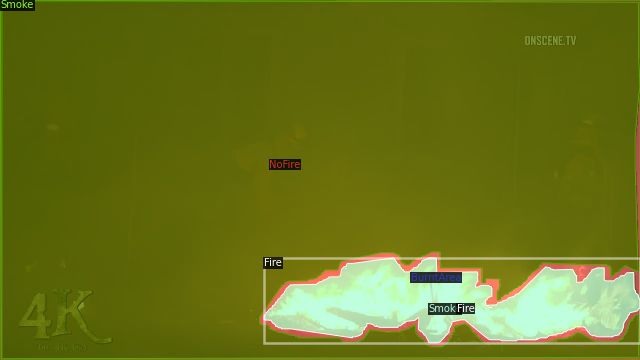

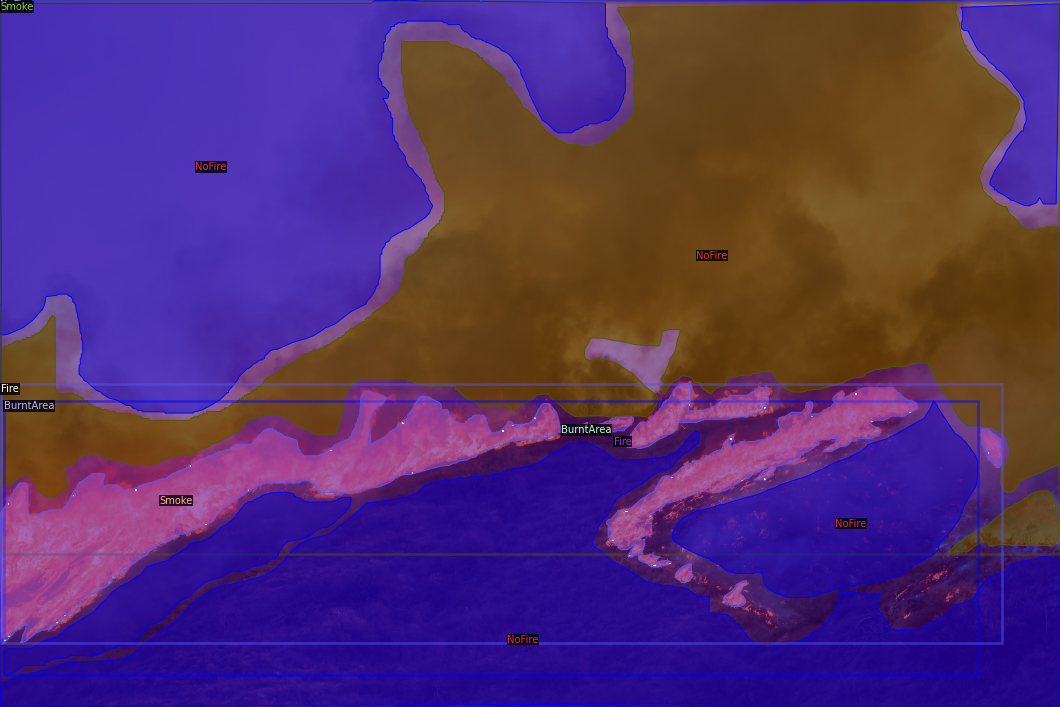

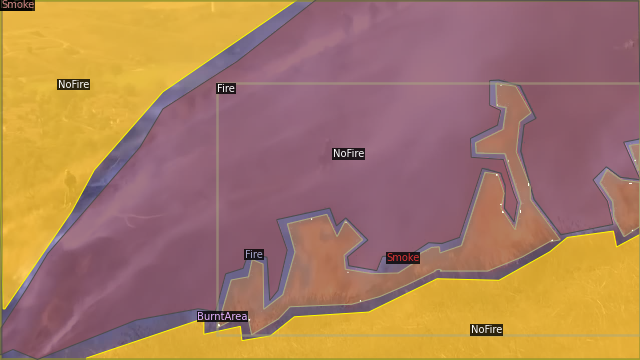

In [ ]:
dataset_metadata = MetadataCatalog.get("my_dataset_train_6")
# Check whether dataset is correctly initialised
#visualise_dataset("train")
#dataset_dicts = get_balloon_dicts(os.path.join("balloon", d))
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=dataset_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    #cv2.imshow(d["file_name"], vis.get_image()[:, :, ::-1])
    cv2_imshow(vis.get_image()[:, :, ::-1])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
##registering again as have modified the dicts obatained from the COCO format , added the segmenattion info
DatasetCatalog.register("my_dataset_train_8", lambda d=d:dataset_dicts)

In [ ]:
MetadataCatalog.get("my_dataset_train_8").thing_classes = ['Fire', 'NoFire', 'Smoke', 'BurntArea']
MetadataCatalog.get("my_dataset_train_8").stuff_classes = ['Fire', 'NoFire', 'Smoke', 'BurntArea']
# MetadataCatalog.get("my_dataset_train_9").thing_dataset_id_to_contiguous_id={0:1,1 : 2, 2: 3, 3:4}

# Config File Initialization

In [ ]:
def init_cfg(config_file: str):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(config_file))
    cfg.DATASETS.TRAIN = ("my_dataset_train_8",)
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_file)  # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
    cfg.SOLVER.MAX_ITER = 1000  # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # only has one class (ballon)
    return cfg

In [ ]:
 cfg = init_cfg("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")

# Train


In [ ]:
def train(cfg):
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()

In [ ]:
train(cfg)

[11/05 00:56:29 d2.engine.defaults]: Model:
PanopticFPN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): 

model_final_c10459.pkl: 184MB [00:06, 27.3MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to

[11/05 00:56:42 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[11/05 00:57:19 d2.utils.events]:  eta: 0:28:35  iter: 19  total_loss: 8.495  loss_sem_seg: 5.186  loss_rpn_cls: 0.3371  loss_rpn_loc: 0.1831  loss_cls: 1.524  loss_box_reg: 0.5288  loss_mask: 0.6931  time: 1.7464  data_time: 0.0624  lr: 4.9953e-06  max_mem: 3933M
[11/05 00:57:54 d2.utils.events]:  eta: 0:28:48  iter: 39  total_loss: 7.573  loss_sem_seg: 4.477  loss_rpn_cls: 0.201  loss_rpn_loc: 0.1672  loss_cls: 1.449  loss_box_reg: 0.5194  loss_mask: 0.6932  time: 1.7603  data_time: 0.0125  lr: 9.9902e-06  max_mem: 3933M
[11/05 00:58:30 d2.utils.events]:  eta: 0:28:23  iter: 59  total_loss: 6.985  loss_sem_seg: 4.104  loss_rpn_cls: 0.1478  loss_rpn_loc: 0.2348  loss_cls: 1.27  loss_box_reg: 0.5549  loss_mask: 0.6913  time: 1.7681  data_time: 0.0120  lr: 1.4985e-05  max_mem: 4074M
[11/05 00:59:05 d2.utils.events]:  eta: 0:27:46  iter: 79  total_loss: 6.446  loss_sem_seg: 3.724  loss_rpn_cls: 0.1191  loss_rpn_loc: 0.1839  loss_cls: 1.052  loss_box_reg: 0.5639  loss_mask: 0.6887  time: 

In [ ]:
MetadataCatalog.get('my_dataset_train_8')

Metadata(name='my_dataset_train_8', stuff_classes=['Fire', 'NoFire', 'Smoke', 'BurntArea'], thing_classes=['Fire', 'NoFire', 'Smoke', 'BurntArea'])

In [ ]:
%mkdir /content/drive/MyDrive/CMPE_295/1000It

In [ ]:
%cp /content/output/ /content/drive/MyDrive/CMPE_295/1000It -r

# Prediction


In [ ]:
def get_predictor(cfg, model_name: str):
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set the testing threshold for this model
   # cfg.DATASETS.TEST = ("balloon_val",)
    predictor = DefaultPredictor(cfg)
    return predictor

segments_info
[{'id': 1, 'isthing': True, 'score': 0.7882320880889893, 'category_id': 0, 'instance_id': 0}, {'id': 2, 'isthing': False, 'category_id': 1, 'area': 28561}]
panoptic_seg
tensor([[2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        ...,
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2]], device='cuda:0', dtype=torch.int32)


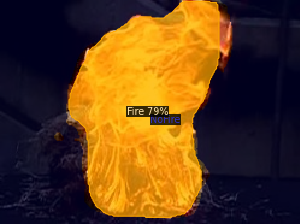

In [ ]:
import cv2
predictor = get_predictor(cfg, "model_final.pth")
inputs = cv2.imread('/content/drive/MyDrive/CMPE_295/OldDetectron2/train/fire2.jpg')
panoptic_seg, segments_info = predictor(inputs)["panoptic_seg"]


print("segments_info")
print(segments_info)
print("panoptic_seg")
print(panoptic_seg)
print
v = Visualizer(inputs[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"),segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

segments_info
[{'id': 1, 'isthing': True, 'score': 0.8004416823387146, 'category_id': 0, 'instance_id': 0}, {'id': 2, 'isthing': False, 'category_id': 1, 'area': 725547}, {'id': 3, 'isthing': False, 'category_id': 2, 'area': 34910}]
panoptic_seg
tensor([[2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        ...,
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2]], device='cuda:0', dtype=torch.int32)


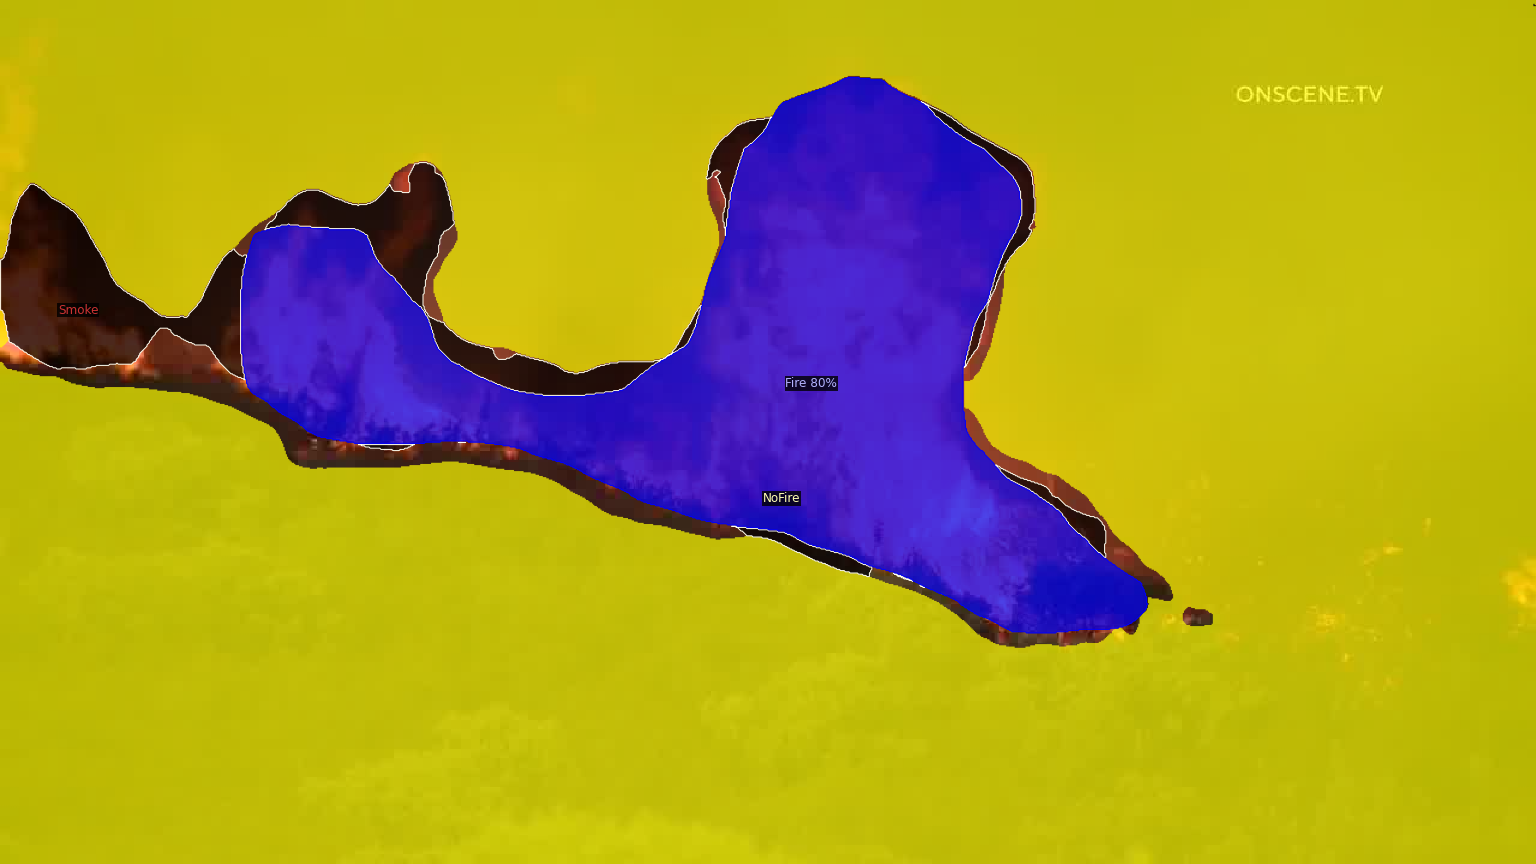

In [ ]:
import cv2
predictor = get_predictor(cfg, "model_final.pth")
inputs = cv2.imread('/content/drive/MyDrive/Panoptic_Segmentation/Dataset/RawVideoValleyFireDestroysDozensofStructures-206.jpg')
panoptic_seg, segments_info = predictor(inputs)["panoptic_seg"]


print("segments_info")
print(segments_info)
print("panoptic_seg")
print(panoptic_seg)
print
v = Visualizer(inputs[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"),segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

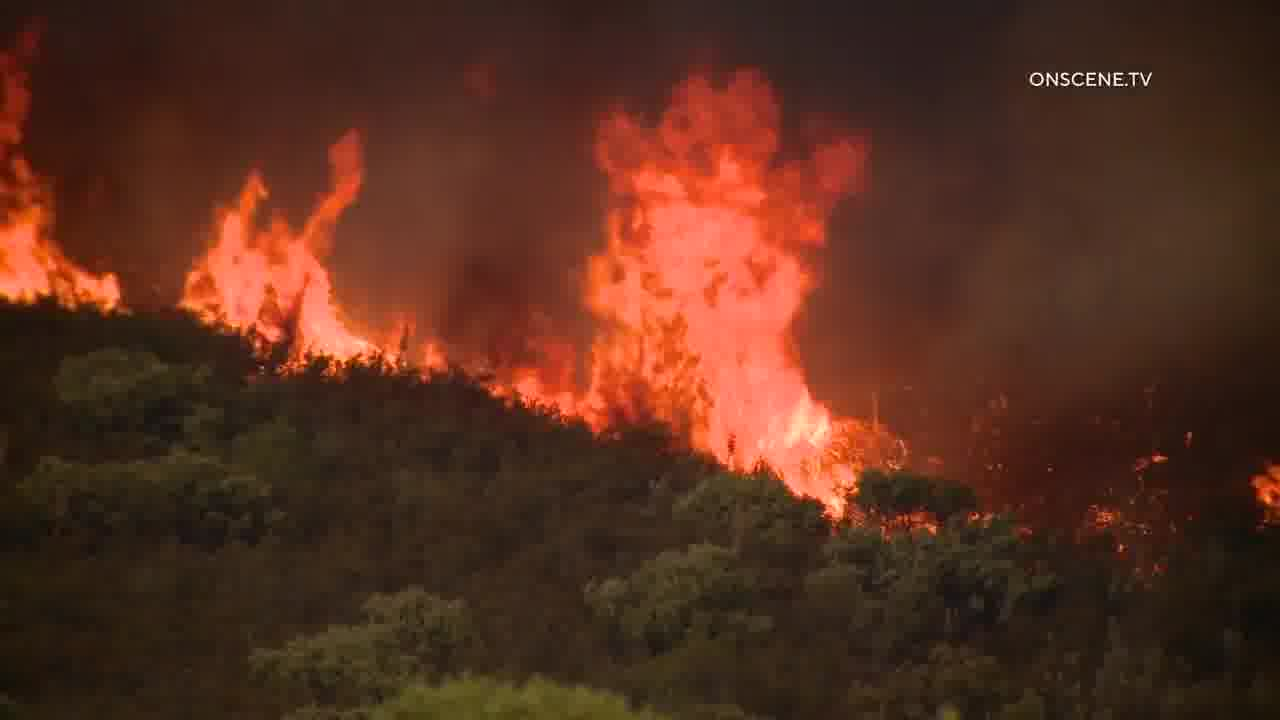

In [ ]:
cv2_imshow(inputs)

#Evaluation

In [ ]:
pip install git+https://github.com/cocodataset/panopticapi.git


  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-llcfcyh5
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-llcfcyh5
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=86c6c423f334f6fb647df5ff812fed9b4370dfe61eaf880ef5430e7fedbb6007
  Stored in directory: /tmp/pip-ephem-wheel-cache-0f3soqw0/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


## Calculate AP

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
predictor = get_predictor(cfg, "model_final.pth")
print(inference_on_dataset(predictor.model, val_loader, evaluator))


[10/30 23:06:56 d2.evaluation.coco_evaluation]: Trying to convert 'my_dataset_train_9' to COCO format ...
[10/30 23:06:56 d2.data.datasets.coco]: Converting annotations of dataset 'my_dataset_train_9' to COCO format ...)
[10/30 23:06:56 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[10/30 23:06:56 d2.data.datasets.coco]: Conversion finished, #images: 76, #annotations: 242
[10/30 23:06:56 d2.data.datasets.coco]: Caching COCO format annotations at './output/my_dataset_train_9_coco_format.json' ...
[10/30 23:06:56 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/30 23:06:56 d2.data.common]: Serializing 76 elements to byte tensors and concatenating them all ...
[10/30 23:06:56 d2.data.common]: Serialized dataset takes 0.63 MiB
[10/30 23:06:57 d2.evaluation.evaluator]: Start inference on 76 batches
[10/30 23:07:04 d2.evaluation.evaluator]: Inference done 

In [ ]:
register_coco_instances("my_dataset_val_5", {}, '/content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-instances-format-val.json', "/content/drive/MyDrive/Panoptic_Segmentation/Dataset/val")

In [ ]:
MetadataCatalog.get("my_dataset_val_5").thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2, 4: 3}
MetadataCatalog.get("my_dataset_val_5").stuff_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2, 4: 3}

In [ ]:
MetadataCatalog.get("my_dataset_val_5").panoptic_json='/content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-panoptic-format-val.json'
MetadataCatalog.get("my_dataset_val_5").panoptic_root='/content/drive/MyDrive/Panoptic_Segmentation/Dataset/panoptic_val'

## Calculate PQ

In [ ]:
from detectron2.evaluation import COCOEvaluator,COCOPanopticEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOPanopticEvaluator("my_dataset_val_5", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val_5")
predictor = get_predictor(cfg, "model_final.pth")
print(inference_on_dataset(predictor.model, val_loader, evaluator))



[11/05 01:29:53 d2.data.datasets.coco]: Loaded 18 images in COCO format from /content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-instances-format-val.json
[11/05 01:29:53 d2.data.build]: Distribution of instances among all 4 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|    Fire    | 18           |   NoFire   | 18           |   Smoke    | 16           |
| BurntArea  | 1            |            |              |            |              |
|   total    | 53           |            |              |            |              |
[11/05 01:29:53 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/05 01:29:53 d2.data.common]: Serializing 18 elements to byte tensors and concatenating them all ...
[11/05 01:29:53 d2.data.comm

#5000 Iterations

In [ ]:
def init_cfg(config_file: str):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(config_file))
    cfg.DATASETS.TRAIN = ("my_dataset_train_8",)
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_file)  # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
    cfg.SOLVER.MAX_ITER = 5000  # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # only has one class (ballon)
    return cfg

In [ ]:
 cfg = init_cfg("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")

def train(cfg):
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()

train(cfg)

[11/05 01:34:04 d2.engine.defaults]: Model:
PanopticFPN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): 

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (4, 256, 1, 1) 

[11/05 01:34:04 d2.engine.train_loop]: Starting training from iteration 0
[11/05 01:34:39 d2.utils.events]:  eta: 2:26:04  iter: 19  total_loss: 8.092  loss_sem_seg: 4.934  loss_rpn_cls: 0.3178  loss_rpn_loc: 0.1841  loss_cls: 1.433  loss_box_reg: 0.5084  loss_mask: 0.6907  time: 1.7247  data_time: 0.0353  lr: 4.9953e-06  max_mem: 4178M
[11/05 01:35:14 d2.utils.events]:  eta: 2:25:29  iter: 39  total_loss: 7.862  loss_sem_seg: 4.875  loss_rpn_cls: 0.2232  loss_rpn_loc: 0.1704  loss_cls: 1.354  loss_box_reg: 0.5737  loss_mask: 0.6917  time: 1.7215  data_time: 0.0117  lr: 9.9902e-06  max_mem: 4178M
[11/05 01:35:48 d2.utils.events]:  eta: 2:24:16  iter: 59  total_loss: 7.011  loss_sem_seg: 4.171  loss_rpn_cls: 0.125  loss_rpn_loc: 0.2218  loss_cls: 1.16  loss_box_reg: 0.5245  loss_mask: 0.6861  time: 1.7212  data_time: 0.0149  lr: 1.4985e-05  max_mem: 4178M
[11/05 01:36:23 d2.utils.events]:  eta: 2:24:16  iter: 79  total_loss: 6.227  loss_sem_seg: 3.459  loss_rpn_cls: 0.1025  loss_rpn_loc

In [ ]:
%mkdir /content/drive/MyDrive/CMPE_295/5000It
%cp /content/output/ /content/drive/MyDrive/CMPE_295/5000It -r

## Infer Image

In [ ]:
def get_predictor(cfg, model_name: str):
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set the testing threshold for this model
   # cfg.DATASETS.TEST = ("balloon_val",)
    predictor = DefaultPredictor(cfg)
    return predictor

import cv2
predictor = get_predictor(cfg, "model_final.pth")
inputs = cv2.imread('/content/drive/MyDrive/Panoptic_Segmentation/Dataset/RawVideoValleyFireDestroysDozensofStructures-206.jpg')
panoptic_seg, segments_info = predictor(inputs)["panoptic_seg"]


print("segments_info")
print(segments_info)
print("panoptic_seg")
print(panoptic_seg)
print
v = Visualizer(inputs[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"),segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

segments_info
[{'id': 1, 'isthing': True, 'score': 0.997422456741333, 'category_id': 1, 'instance_id': 0}, {'id': 2, 'isthing': True, 'score': 0.8822759985923767, 'category_id': 0, 'instance_id': 1}, {'id': 3, 'isthing': True, 'score': 0.8308045864105225, 'category_id': 2, 'instance_id': 2}, {'id': 4, 'isthing': False, 'category_id': 1, 'area': 129211}, {'id': 5, 'isthing': False, 'category_id': 2, 'area': 8591}]
panoptic_seg
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.int32)


In [ ]:
pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-2qbc07eq
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-2qbc07eq
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=f6d3ee50f577415c364f5a3360298b994dc315a79482602fa104b0f4a396a535
  Stored in directory: /tmp/pip-ephem-wheel-cache-dacjq0i1/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


## Calculate PQ

In [ ]:
from detectron2.evaluation import COCOEvaluator,COCOPanopticEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOPanopticEvaluator("my_dataset_val_5", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val_5")
predictor = get_predictor(cfg, "model_final.pth")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[11/05 04:04:16 d2.data.datasets.coco]: Loaded 18 images in COCO format from /content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-instances-format-val.json
[11/05 04:04:16 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/05 04:04:16 d2.data.common]: Serializing 18 elements to byte tensors and concatenating them all ...
[11/05 04:04:16 d2.data.common]: Serialized dataset takes 0.08 MiB
[11/05 04:04:17 d2.evaluation.evaluator]: Start inference on 18 batches
[11/05 04:04:23 d2.evaluation.evaluator]: Inference done 11/18. Dataloading: 0.0020 s/iter. Inference: 0.4207 s/iter. Eval: 0.0804 s/iter. Total: 0.5031 s/iter. ETA=0:00:03
[11/05 04:04:27 d2.evaluation.evaluator]: Total inference time: 0:00:06.706538 (0.515888 s / iter per device, on 1 devices)
[11/05 04:04:27 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:05 (0.422583 s / iter 

#10000 iterations

In [ ]:
def init_cfg_1(config_file: str):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(config_file))
    cfg.DATASETS.TRAIN = ("my_dataset_train_8",)
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/CMPE_295/5000It/output/model_final.pth" # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
    cfg.SOLVER.MAX_ITER = 5000  # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # only has one class (ballon)
    return cfg

In [ ]:
cfg = init_cfg_1("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")

def train(cfg):
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()

train(cfg)

[11/05 16:35:33 d2.engine.defaults]: Model:
PanopticFPN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): 

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[11/05 16:35:55 d2.utils.events]:  eta: 1:01:44  iter: 19  total_loss: 0.666  loss_sem_seg: 0.1133  loss_rpn_cls: 0.003362  loss_rpn_loc: 0.082  loss_cls: 0.1066  loss_box_reg: 0.2046  loss_mask: 0.1687  time: 0.7411  data_time: 0.3848  lr: 4.9953e-06  max_mem: 3943M
[11/05 16:36:11 d2.utils.events]:  eta: 1:01:52  iter: 39  total_loss: 0.7174  loss_sem_seg: 0.1248  loss_rpn_cls: 0.002243  loss_rpn_loc: 0.09173  loss_cls: 0.09567  loss_box_reg: 0.19  loss_mask: 0.1707  time: 0.7718  data_time: 0.4284  lr: 9.9902e-06  max_mem: 3943M
[11/05 16:36:25 d2.utils.events]:  eta: 1:01:06  iter: 59  total_loss: 0.6496  loss_sem_seg: 0.107  loss_rpn_cls: 0.003958  loss_rpn_loc: 0.1167  loss_cls: 0.07159  loss_box_reg: 0.1884  loss_mask: 0.1436  time: 0.7474  data_time: 0.3287  lr: 1.4985e-05  max_mem: 3943M
[11/05 16:36:42 d2.utils.events]:  eta: 1:00:45  iter: 79  total_loss: 0.7462  loss_sem_seg: 0.1175  loss_rpn_cls: 0.002724  loss_rpn_loc: 0.09916  loss_cls: 0.09784  loss_box_reg: 0.2067  los

In [ ]:
# %mkdir /content/drive/MyDrive/CMPE_295/10000It
%cp /content/output/ /content/drive/MyDrive/CMPE_295/10000It -r

## Infer Image

segments_info
[{'id': 1, 'isthing': True, 'score': 0.9998805522918701, 'category_id': 1, 'instance_id': 0}, {'id': 2, 'isthing': True, 'score': 0.9799566268920898, 'category_id': 2, 'instance_id': 1}, {'id': 3, 'isthing': True, 'score': 0.9691025614738464, 'category_id': 0, 'instance_id': 2}, {'id': 4, 'isthing': False, 'category_id': 1, 'area': 101975}, {'id': 5, 'isthing': False, 'category_id': 2, 'area': 6894}]
panoptic_seg
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.int32)


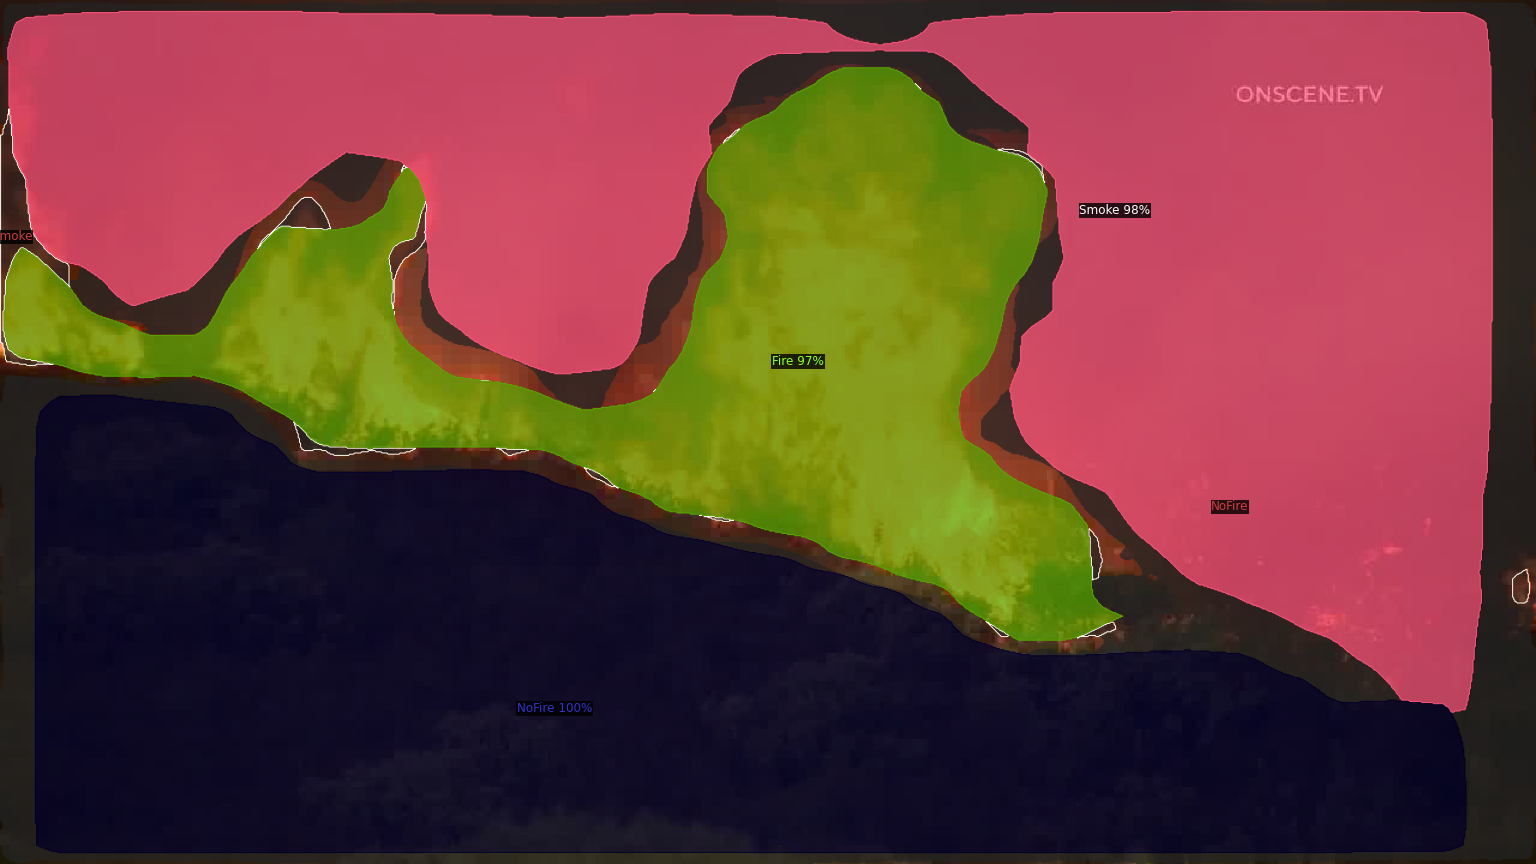

In [ ]:
def get_predictor(cfg, model_name: str):
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set the testing threshold for this model
   # cfg.DATASETS.TEST = ("balloon_val",)
    predictor = DefaultPredictor(cfg)
    return predictor

import cv2
predictor = get_predictor(cfg, "model_final.pth")
inputs = cv2.imread('/content/drive/MyDrive/Panoptic_Segmentation/Dataset/RawVideoValleyFireDestroysDozensofStructures-206.jpg')
panoptic_seg, segments_info = predictor(inputs)["panoptic_seg"]


print("segments_info")
print(segments_info)
print("panoptic_seg")
print(panoptic_seg)
print
v = Visualizer(inputs[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"),segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

## Calculate PQ

In [ ]:
from detectron2.evaluation import COCOEvaluator,COCOPanopticEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOPanopticEvaluator("my_dataset_val_5", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val_5")
predictor = get_predictor(cfg, "model_final.pth")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[11/05 17:11:12 d2.data.datasets.coco]: Loaded 18 images in COCO format from /content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-instances-format-val.json
[11/05 17:11:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/05 17:11:12 d2.data.common]: Serializing 18 elements to byte tensors and concatenating them all ...
[11/05 17:11:12 d2.data.common]: Serialized dataset takes 0.08 MiB
[11/05 17:11:13 d2.evaluation.evaluator]: Start inference on 18 batches
[11/05 17:11:15 d2.evaluation.evaluator]: Inference done 11/18. Dataloading: 0.0013 s/iter. Inference: 0.0863 s/iter. Eval: 0.0686 s/iter. Total: 0.1562 s/iter. ETA=0:00:01
[11/05 17:11:16 d2.evaluation.evaluator]: Total inference time: 0:00:02.131343 (0.163949 s / iter per device, on 1 devices)
[11/05 17:11:16 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.086705 s / iter 

#20000 Iterations

In [ ]:
def init_cfg_2(config_file: str):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(config_file))
    cfg.DATASETS.TRAIN = ("my_dataset_train_8",)
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/CMPE_295/10000It/output/model_final.pth" # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
    cfg.SOLVER.MAX_ITER = 10000  # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # only has one class (ballon)
    return cfg

In [ ]:
cfg = init_cfg_2("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")

def train(cfg):
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()

train(cfg)

[11/05 17:12:59 d2.engine.defaults]: Model:
PanopticFPN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): 

In [ ]:
%mkdir /content/drive/MyDrive/CMPE_295/20000It
%cp /content/output/ /content/drive/MyDrive/CMPE_295/20000It -r

## Infer Image

In [ ]:
def get_predictor(cfg, model_name: str):
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set the testing threshold for this model
   # cfg.DATASETS.TEST = ("balloon_val",)
    predictor = DefaultPredictor(cfg)
    return predictor

import cv2
predictor = get_predictor(cfg, "model_final.pth")
inputs = cv2.imread('/content/drive/MyDrive/Panoptic_Segmentation/Dataset/RawVideoValleyFireDestroysDozensofStructures-206.jpg')
panoptic_seg, segments_info = predictor(inputs)["panoptic_seg"]


print("segments_info")
print(segments_info)
print("panoptic_seg")
print(panoptic_seg)
print
v = Visualizer(inputs[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"),segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

segments_info
[{'id': 1, 'isthing': True, 'score': 0.9999879598617554, 'category_id': 1, 'instance_id': 0}, {'id': 2, 'isthing': True, 'score': 0.9955880641937256, 'category_id': 0, 'instance_id': 1}, {'id': 3, 'isthing': True, 'score': 0.9341778755187988, 'category_id': 2, 'instance_id': 2}, {'id': 4, 'isthing': False, 'category_id': 1, 'area': 246514}, {'id': 5, 'isthing': False, 'category_id': 2, 'area': 18743}]
panoptic_seg
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.int32)


##Calculate PQ

In [ ]:
from detectron2.evaluation import COCOEvaluator,COCOPanopticEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOPanopticEvaluator("my_dataset_val_5", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val_5")
predictor = get_predictor(cfg, "model_final.pth")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[11/05 18:18:34 d2.data.datasets.coco]: Loaded 18 images in COCO format from /content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-instances-format-val.json
[11/05 18:18:34 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/05 18:18:34 d2.data.common]: Serializing 18 elements to byte tensors and concatenating them all ...
[11/05 18:18:34 d2.data.common]: Serialized dataset takes 0.08 MiB
[11/05 18:18:35 d2.evaluation.evaluator]: Start inference on 18 batches
[11/05 18:18:37 d2.evaluation.evaluator]: Inference done 11/18. Dataloading: 0.0012 s/iter. Inference: 0.0869 s/iter. Eval: 0.0666 s/iter. Total: 0.1547 s/iter. ETA=0:00:01
[11/05 18:18:38 d2.evaluation.evaluator]: Total inference time: 0:00:02.139070 (0.164544 s / iter per device, on 1 devices)
[11/05 18:18:38 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.086739 s / iter 

#30000 Iterations

In [ ]:
def init_cfg_3(config_file: str):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(config_file))
    cfg.DATASETS.TRAIN = ("my_dataset_train_8",)
    cfg.DATASETS.TEST = ()
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/CMPE_295/20000It/output/model_final.pth" # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
    cfg.SOLVER.MAX_ITER = 10000  # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # only has one class (ballon)
    return cfg

In [ ]:
cfg = init_cfg_3("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")

def train(cfg):
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()

train(cfg)

[11/05 18:23:32 d2.engine.defaults]: Model:
PanopticFPN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): 

In [ ]:
%mkdir /content/drive/MyDrive/CMPE_295/30000It
%cp /content/output/ /content/drive/MyDrive/CMPE_295/30000It -r

## Infer Image

segments_info
[{'id': 1, 'isthing': True, 'score': 0.9999896287918091, 'category_id': 1, 'instance_id': 0}, {'id': 2, 'isthing': True, 'score': 0.9973880648612976, 'category_id': 0, 'instance_id': 1}, {'id': 3, 'isthing': True, 'score': 0.9902467727661133, 'category_id': 2, 'instance_id': 2}, {'id': 4, 'isthing': False, 'category_id': 1, 'area': 67797}, {'id': 5, 'isthing': False, 'category_id': 2, 'area': 20479}]
panoptic_seg
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.int32)


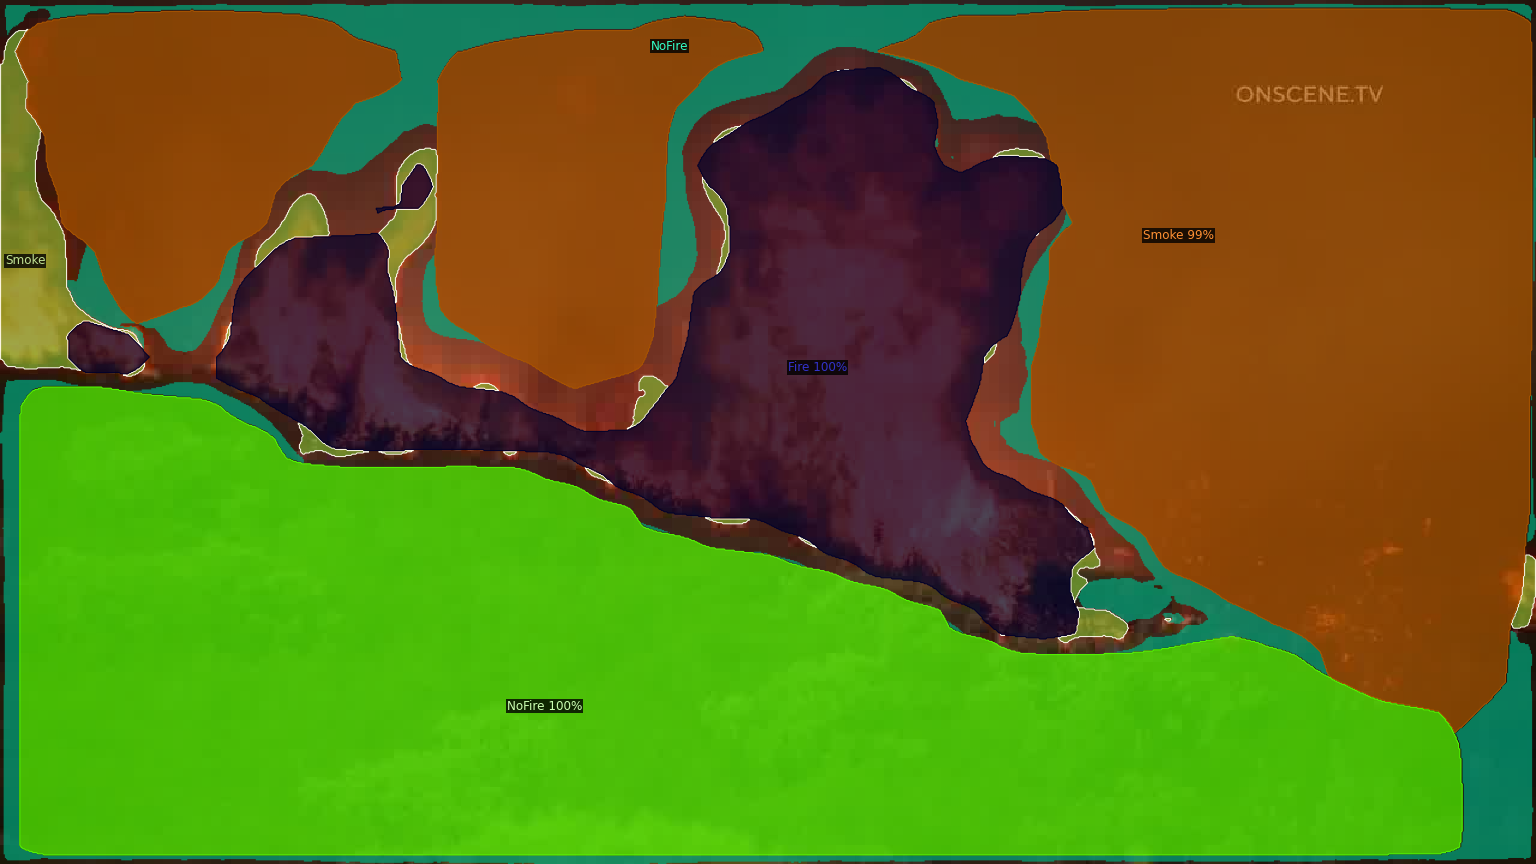

In [ ]:
def get_predictor(cfg, model_name: str):
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set the testing threshold for this model
   # cfg.DATASETS.TEST = ("balloon_val",)
    predictor = DefaultPredictor(cfg)
    return predictor

import cv2
predictor = get_predictor(cfg, "model_final.pth")
inputs = cv2.imread('/content/drive/MyDrive/Panoptic_Segmentation/Dataset/RawVideoValleyFireDestroysDozensofStructures-206.jpg')
panoptic_seg, segments_info = predictor(inputs)["panoptic_seg"]


print("segments_info")
print(segments_info)
print("panoptic_seg")
print(panoptic_seg)
print
v = Visualizer(inputs[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"),segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

##Calculate PQ

In [ ]:
from detectron2.evaluation import COCOEvaluator,COCOPanopticEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOPanopticEvaluator("my_dataset_val_5", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val_5")
predictor = get_predictor(cfg, "model_final.pth")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[11/05 19:32:38 d2.data.datasets.coco]: Loaded 18 images in COCO format from /content/drive/MyDrive/Panoptic_Segmentation/Dataset/annotations/fire-net-instances-format-val.json
[11/05 19:32:38 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/05 19:32:38 d2.data.common]: Serializing 18 elements to byte tensors and concatenating them all ...
[11/05 19:32:38 d2.data.common]: Serialized dataset takes 0.08 MiB
[11/05 19:32:39 d2.evaluation.evaluator]: Start inference on 18 batches
[11/05 19:32:41 d2.evaluation.evaluator]: Inference done 11/18. Dataloading: 0.0013 s/iter. Inference: 0.0861 s/iter. Eval: 0.0664 s/iter. Total: 0.1538 s/iter. ETA=0:00:01
[11/05 19:32:42 d2.evaluation.evaluator]: Total inference time: 0:00:02.121417 (0.163186 s / iter per device, on 1 devices)
[11/05 19:32:42 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.086412 s / iter 

In [ ]:
def get_predictor(cfg, model_name: str):
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set the testing threshold for this model
   # cfg.DATASETS.TEST = ("balloon_val",)
    predictor = DefaultPredictor(cfg)
    return predictor

import cv2
predictor = get_predictor(cfg, "model_final.pth")
inputs = cv2.imread('/content/drive/MyDrive/CMPE_295/Test4/DJI_0002-122.jpg')
panoptic_seg, segments_info = predictor(inputs)["panoptic_seg"]


print("segments_info")
print(segments_info)
print("panoptic_seg")
print(panoptic_seg)
print
v = Visualizer(inputs[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"),segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

segments_info
[{'id': 1, 'isthing': True, 'score': 0.9951196908950806, 'category_id': 2, 'instance_id': 0}, {'id': 2, 'isthing': True, 'score': 0.9949883222579956, 'category_id': 0, 'instance_id': 1}, {'id': 3, 'isthing': True, 'score': 0.994284451007843, 'category_id': 1, 'instance_id': 2}, {'id': 4, 'isthing': False, 'category_id': 1, 'area': 49502}, {'id': 5, 'isthing': False, 'category_id': 2, 'area': 20840}]
panoptic_seg
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.int32)


#Video Inference

In [ ]:
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl
!youtube-dl https://www.youtube.com/watch?v=ISfSaXEIiVw -f 22 -o "/content/drive/MyDrive/Panoptic_Segmentation/Inference - Video Visualization Panoptic DeepLab/RAW Input Videos/10.mp4"


In [ ]:
!ffmpeg -i "/content/drive/MyDrive/Panoptic_Segmentation/Inference - Video Visualization Panoptic DeepLab/RAW Input Videos /10.mp4" -q:v 0 output_2.mp4

In [ ]:
!git clone https://github.com/facebookresearch/detectron2

Add categories to demo.py

In [ ]:
%run detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml --video-input "/content/drive/MyDrive/Panoptic_Segmentation/Inference - Video Visualization Panoptic DeepLab/RAW Input Videos /10.mp4"  --confidence-threshold 0.6 --output "/content/drive/MyDrive/Panoptic_Segmentation/Inference - Video Visualization Panoptic DeepLab/Video Visualization FPN/video1.mkv" \
  --opts MODEL.WEIGHTS /content/drive/MyDrive/CMPE_295/30000It/output/model_final.pth